In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.__version__

'1.3.0'

In [ ]:
!pip install pandas==0.25

     |████████████████████████████████| 10.4MB 4.0MB/s 
ERROR: xarray 0.18.2 has requirement pandas>=1.0, but you'll have pandas 0.25.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 0.25.0 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement pandas>=1.0.4, but you'll have pandas 0.25.0 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


In [ ]:
acc_df = pd.read_csv('/content/drive/MyDrive/Mastech InfoTrellis/accepted_2007_to_2018Q4.csv')
##rej_df= pd.read_csv('rejected_2007_to_2018Q4.csv')
acc_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id  member_id  ...  settlement_percentage  settlement_term
0  68407277        NaN  ...                    NaN              NaN
1  68355089        NaN  ...                    NaN              NaN
2  68341763        NaN  ...                    NaN              NaN
3  66310712        NaN  ...                    NaN              NaN
4  68476807        NaN  ...                    NaN              NaN

[5 rows x 151 columns]

In [ ]:
!pip install autoviz

     |████████████████████████████████| 51kB 3.9MB/s 


In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
#acc_df.drop('id', 1, inplace=True) 
df = AV.AutoViz('/content/drive/MyDrive/Mastech InfoTrellis/accepted_2007_to_2018Q4.csv')

In [ ]:
from pandas_profiling import ProfileReport
design_report = ProfileReport(acc_df)

/usr/local/lib/python3.7/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


TypeError: ignored

In [ ]:
design_report.to_file('report.html')

In [ ]:
design_report

In [ ]:
acc_df['loan_amnt'].isnull().sum()

33

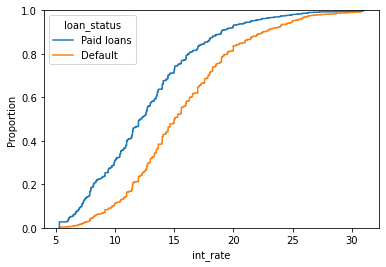

In [ ]:
sns.ecdfplot(data = acc_df,x = 'int_rate',hue = 'loan_status')

In [ ]:
def get_box_plot(df,x,target_variable):
  """
  This function plots the boxplot for the given numerical variable seperately for different loan status.
  param df: df is our dataframe
  param x: x is our numerical feature for which we want the boxplot
  param target_variable: This will be our target variable and for our purpose it will be loan status
  """
  sns.boxplot(data = df,x = x,y = target_variable)

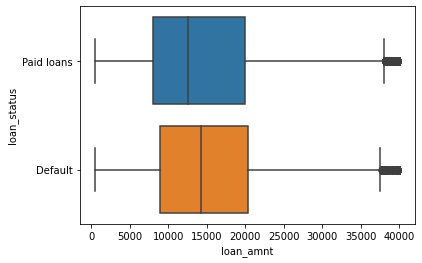

In [ ]:
get_box_plot(acc_df,'loan_amnt','loan_status')

In [ ]:
from scipy.stats import kurtosis
from scipy.stats import skew
def get_skewness_and_kurtosis(df,colname):
    """
     This function is used for calculating the skewness and kurtosis for a particular column in our dataframe
    :param df: df is our dataframe
    :param colname: colname is the name of the column for which we want the shape parameters of the distribution
    :return: returns a tuple which gives skewness and kurtosis
    """
    df = df.copy()
    #This line will replace the null values in a column by its mean
    df[colname] = df[colname].fillna(df[colname].mean())
    skewness = skew(list(df[colname]))
    kurt = kurtosis(list(df[colname]))
    return skewness,kurt

In [ ]:
get_skewness_and_kurtosis(acc_df,'loan_amnt')

(0.7777874894360685, -0.11939949875931477)

In [ ]:
acc_df['loan_amnt'].isnull().sum()

33

In [ ]:
from scipy import stats
def get_trimmed_mean(df,colname,proportion):
  """
    This function is used for calculating the trimmed mean for a particular column in our dataframe
    :param df: df is our dataframe
    :param colname: colname is the name of the column for which we want the trimmed mean
    :param proportion: Fraction to cut off of both tails of the distribution
    :return: returns the trimmed mean
  """
  df = df.copy()
  #This line will replace the null values in a column by its mean
  df[colname] = df[colname].fillna(df[colname].mean())
  trimmed_mean = stats.trim_mean(list(df[colname]),proportion)
  return trimmed_mean

In [ ]:
numerical = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newsample = sample.select_dtypes(include = numerical)

member_id  loan_amnt  ...  settlement_percentage  settlement_term
0         NaN     3600.0  ...                    NaN              NaN
1         NaN    24700.0  ...                    NaN              NaN
2         NaN    20000.0  ...                    NaN              NaN
3         NaN    35000.0  ...                    NaN              NaN
4         NaN    10400.0  ...                    NaN              NaN
..        ...        ...  ...                    ...              ...
95        NaN     8000.0  ...                    NaN              NaN
96        NaN    12000.0  ...                    NaN              NaN
97        NaN    18000.0  ...                    NaN              NaN
98        NaN     3600.0  ...                    NaN              NaN
99        NaN     7200.0  ...                  50.01             10.0

[100 rows x 113 columns]

In [ ]:
import numpy as np
from scipy.stats.mstats import winsorize

def get_winsorized_mean_stats(df, limits):
  """
   This function takes a dataframe and calculates the winsorized mean for every numerical column in
   the dataframe.
   param df: df is the dataframe for which we want to calculate the winsorized mean
   param limits: Tuple of the percentages to cut on each side of the array, with respect to the number of unmasked data, 
                 as floats between 0. and 1. Noting n the number of unmasked data before trimming, the (n*limits[0])th smallest data and 
                 the (n*limits[1])th largest data are masked, and the total number of unmasked data after trimming is n*(1.-sum(limits)) 
                 The value of one limit can be set to None to indicate an open interval.  
   return : returns a new dataframe with winsorized means for different columns.
   """

  numerical = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  #Extracting numerical columns only from the whole dataframe
  df = df.select_dtypes(include = numerical)
  #Replacing the null values in each column by the respective mean of that column
  df = df.apply(lambda x: x.fillna(x.mean()))
  winsorized_val = []
  for i in df.columns:
    x = df[i].to_numpy()
    val = np.mean(winsorize(x, limits))
    winsorized_val.append(val)
  #Creating a dataframe with winsorized means for different columns in our dataframe
  winsorized_df = pd.DataFrame(data = list(zip(df.columns,winsorized_val)), columns = ['column_name', 'winsorized_mean'])
  return winsorized_df

In [ ]:
winsorized_df = winsorized_mean(acc_df,[0.1,0.2])
winsorized_df

column_name  winsorized_mean
0                         member_id              NaN
1                         loan_amnt     13846.437244
2                       funded_amnt     13837.552334
3                   funded_amnt_inv     13825.258120
4                          int_rate        12.484305
..                              ...              ...
108  hardship_payoff_balance_amount     11636.883942
109    hardship_last_payment_amount       193.994321
110               settlement_amount      5010.664267
111           settlement_percentage        47.780365
112                 settlement_term        13.191322

[113 rows x 2 columns]

In [ ]:
def get_trimmed_mean_stats(df,proportion):
   """
   This function takes a dataframe and calculates the trimmed mean for every numerical column in
   the dataframe.
   param df: df is the dataframe for which we want to calculate the trimmed mean
   param proportion: This is the fraction to cut off of both tails of the distribution   
   return : returns a new dataframe with trimmed means for different columns.
   """
   numerical = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
   #Extracting numerical columns only from the whole dataframe
   df = df.select_dtypes(include = numerical)
   #Replacing the null values in each column by the respective mean of that column
   df = df.apply(lambda x: x.fillna(x.mean()))
   #Creating a dataframe with trimmed means for different columns in our dataframe
   trimmed_means = stats.trim_mean(df,proportion,axis = 0)
   trimmed_df = pd.DataFrame(data = list(zip(df.columns, trimmed_means)), columns = ['column_name', 'trimmed_mean'])
   return trimmed_df

In [ ]:
trim = trimmed_mean_stats(acc_df,0.1)
trim

column_name  trimmed_mean
0                         member_id           NaN
1                         loan_amnt  14136.508790
2                       funded_amnt  14130.443444
3                   funded_amnt_inv  14112.992573
4                          int_rate     12.708293
..                              ...           ...
108  hardship_payoff_balance_amount  11636.883942
109    hardship_last_payment_amount    193.994321
110               settlement_amount   5010.664267
111           settlement_percentage     47.780365
112                 settlement_term     13.191322

[113 rows x 2 columns]

In [ ]:
import numpy as np
from scipy.stats.mstats import winsorize

# a = np.array([10, 4, 9, 8, 5, 3, 7, 2, 1, 6])
# limits=[0.1, 0.2]

def winsorized_mean(df, colname, limits):
  # df = df.copy()
  df[colname] = df[colname].fillna((df[colname].mean()))
  winsoried_val = winsorize(df, limits)
  return winsoried_val


winsorized_mean(acc_df, 'loan_amnt', [0.1, 0.2])

In [ ]:
from scipy.stats import kstest
from scipy.stats import ks_2samp
def get_ks_statistic(df,colname,target_column):
  """
    This function takes a column_name and seperates the data based on the target column and then compare the distributions of this column for different
    target values.This function is designed such that the target column has only two unique values.This function returns k-s test results.
    param df: df is our dataframe
    param colname: colname is the name of the column for which we want to compare the distributions seperated by the target value
    param target_column: This is the target column based on which we want to compare the distributions.
    return: returns a tuple of ks_statistic and p-value
  """
  df = df.copy()
  #Replacing the missing values with the mean
  df[colname] = df[colname].fillna(df[colname].mean())
  targets = list(df[target_column].unique())
  data1 = list((df[df[target_column] == targets[0]])[colname])
  data2 = list((df[df[target_column] == targets[1]])[colname])
  ks_stats =  ks_2samp(data1, data2)
  return ks_stats.statistic,ks_stats.pvalue


In [ ]:
get_ks_statistic(acc_df,)

(0.056533677840878926, 0.0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ensure your arr is sorted from lowest to highest values first!

def gini_calculate(df, colname):
  
  colname = str(colname)
  df[colname] = df[colname].fillna((df[colname].mean()))
  arr = df[colname].to_numpy()
  arr = np.sort(arr)
  
  def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

  def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

  # show the gini index!
  print(gini(arr))
  print('\n')
  lorenz_curve = lorenz(arr)

  # we need the X values to be between 0.0 to 1.0
  plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
  # plot the straight line perfect equality curve
  plt.plot([0,1], [0,1])
  plt.show()

gini_calculate(acc_df, 'loan_amnt')

In [ ]:
from scipy.stats import kstest
from scipy.stats import ks_2samp
data1 = list((acc_df[acc_df['loan_status'] == 'Paid loans'])['loan_amnt'])
data2 = list((acc_df[acc_df['loan_status'] == 'Default'])[''])
ks_stats =  ks_2samp(data1, data2)
print(ks_stats.statistic)
print(ks_stats.pvalue)

0.056533677840878926
0.0


In [ ]:
acc_df['loan_status'].unique()

array(['Paid loans', 'Default', nan], dtype=object)

In [ ]:
standard_deviation = np.std(acc_df['loan_amnt'])
data = list(acc_df['loan_amnt'].fillna(acc_df['loan_amnt'].mean()))
mean = np.mean(data)
print(standard_deviation,mean)

9190.243455577642 15046.93122784947


In [ ]:
skew_ness = [(i-mean)/standard_deviation for i in data]
skew_ness = [i**4 for i in skew_ness]
skew_ness = np.sum(skew_ness)/len(skew_ness)
print(skew_ness-3)

-0.11948359577230416


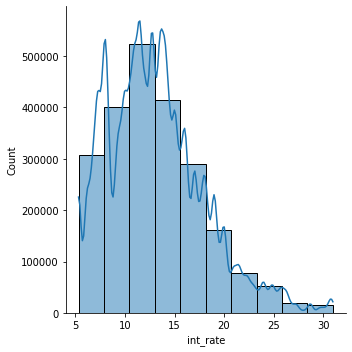

In [ ]:
sns.displot(acc_df['int_rate'],kde = True,bins = 10)

In [ ]:
numerical = [i for i in acc_df.columns if acc_df[i].dtype == 'float64']

In [ ]:
len(numerical)

113

In [ ]:
from scipy.stats import kstest
from scipy.stats import ks_2samp
data1 = list((acc_df[acc_df['loan_status'] == 'Default'])['loan_amnt'])
data2 = list((acc_df[acc_df['loan_status'] == 'Paid loans'])['loan_amnt'])
a = ks_2samp(data1, data2)

In [ ]:
a.statistic
a.pvalue

0.0

In [ ]:
numerical[0:5]

['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate']

In [ ]:
ks_test = {}
for i in numerical:
    data1 = list((acc_df[acc_df['loan_status'] == 'Default'])[i])
    data2 = list((acc_df[acc_df['loan_status'] == 'Paid loans'])[i])
    ks_test[i] = ks_2samp(data1, data2)

In [ ]:
kstest_df = pd.DataFrame.from_dict(ks_test).T
kstest_df= kstest_df.reset_index()
kstest_df.columns = ['Column_name','Statistic','p-value']
kstest_df.to_csv('kstest.csv',index = False)

In [ ]:
kstest_df

Column_name  Statistic       p-value
0                         member_id  -0.000000  1.000000e+00
1                         loan_amnt   0.056534  0.000000e+00
2                       funded_amnt   0.056477  0.000000e+00
3                   funded_amnt_inv   0.055621  0.000000e+00
4                          int_rate   0.262412  0.000000e+00
..                              ...        ...           ...
108  hardship_payoff_balance_amount   0.011640  2.384140e-28
109    hardship_last_payment_amount   0.011638  2.451192e-28
110               settlement_amount   0.123097  0.000000e+00
111           settlement_percentage   0.123097  0.000000e+00
112                 settlement_term   0.123097  0.000000e+00

[113 rows x 3 columns]

In [ ]:
d1 = [i for i in range(100)]
d2 = [i for i in range(100,200)]
ks_2samp(d1, d2)

Ks_2sampResult(statistic=1.0, pvalue=2.2087606931995054e-59)

In [ ]:
def create_bins(data, rnge, bins='doane', clmName=None):
    """

    :param data:
    :param range:
    :param bins:
    :param clmName:
    :return:
    """
    bin_value = np.histogram_bin_edges(data[clmName], bins= 10, range=rnge)

    data[clmName + '_counts'] = np.NAN
    data[clmName + 'range_min'] = np.NAN
    for i in range(bin_value.shape[0] - 1):
        if i == len(bin_value) - 1:
            idx = data[(data[clmName] >= bin_value[i]) & (data[clmName] <= bin_value[i + 1])].index

        else:
            idx = data[(data[clmName] >= bin_value[i]) & (data[clmName] < bin_value[i + 1])].index

        data.loc[idx, clmName + '_counts'] = f'{round(bin_value[i], 2)}-{round(bin_value[i + 1], 2)}'
        data.loc[idx, clmName + 'range_min'] = round(bin_value[i], 2)

    return data

In [ ]:
create_bins(data= )

In [ ]:
def plot_graph(data, x, dtype, y=None, hue='TARGET'):
    """

    :param df:
    :param x:
    :param y:
    :param dtype:
    :return:
    """
    print(data.head())
    if dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        temp = data.groupby([cl_nm + 'range_min', cl_nm + '_counts', hue]).id.count().reset_index()
        temp.sort_values(by=cl_nm + 'range_min', inplace=True)
        print(temp)
        temp1 = data.groupby([cl_nm + 'range_min', cl_nm + '_counts', hue]).size().unstack(fill_value=0).reset_index()
        print('temp1  = ', temp1)
        temp1['bad/good'] = temp1['Bad Loan'] / temp1['Good Loan']

        temp1.sort_values(by=cl_nm + 'range_min', inplace=True)

    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax2 = ax1.twinx()

    g = sns.barplot(data=temp, x=cl_nm + '_counts', y='id', hue="TARGET", ax=ax1)

    sns.lineplot(data=temp1[[cl_nm + '_counts', 'bad/good']], marker='o', sort=False, ax=ax2, legend=False)

    g.legend(loc='upper left')

    ax1.xaxis.set_tick_params(rotation=45)

    ax1.set_ylabel('Population Count')
    ax2.set_ylabel('Bad/Good')
    ax2.grid(False)
    ax1.set_xlabel(f'{cl_nm} range')

    #fig.savefig(f'../New Charts/{x}vs counts.png')

    plt.show()


In [ ]:
df = create_bins(data=acc_df, clmName=cl_nm, rnge=(q_min, q_max))
plot_graph(data=acc_df, x=cl_nm, dtype=df[cl_nm].dtypes)

In [ ]:
acc_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #   Column                                      Non-Null Count    Dtype  
---  ------                                      --------------    -----  
 0   id                                          2260701 non-null  object 
 1   member_id                                   0 non-null        float64
 2   loan_amnt                                   2260668 non-null  float64
 3   funded_amnt                                 2260668 non-null  float64
 4   funded_amnt_inv                             2260668 non-null  float64
 5   term                                        2260668 non-null  object 
 6   int_rate                                    2260668 non-null  float64
 7   installment                                 2260668 non-null  float64
 8   grade                                       2260668 non-null  object 
 9   sub_grade                                   2260668 non-

In [ ]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    array = array.flatten()
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

In [ ]:
loan_status_dict = {'Current':'Paid loans','Fully Paid':'Paid loans', 'Charged Off':'Default', 'In Grace Period':'Paid loans','Late (31-120 days)':'Paid loans', 'Late (16-30 days)':'Paid loans',
                    'Does not meet the credit policy. Status:Fully Paid':'Paid loans','Does not meet the credit policy. Status:Charged Off':'Default',
                    'Default':'Default'}

In [ ]:
acc_df['loan_status'] = acc_df['loan_status'].map(loan_status_dict)

In [ ]:
acc_df['loan_status'].value_counts()

Paid loans    1991308
Default        269360
Name: loan_status, dtype: int64

In [ ]:
di = {'Default':1,'Paid loans':0}

In [ ]:
acc_df['loan_status'] = acc_df['loan_status'].map(di)

In [ ]:
acc_df['loan_status'].value_counts()

0.0    1991308
1.0     269360
Name: loan_status, dtype: int64

In [ ]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [ ]:
woedf

Variable         Cutoff     N  ...  % of Non-Events       WoE        IV
0                id          54734     1  ...         0.000002 -1.307351  0.000002
1                id          55716     1  ...         0.000002 -1.307351  0.000002
2                id          55742     1  ...         0.000002 -1.307351  0.000002
3                id          56121     1  ...         0.000004 -2.693645  0.000009
4                id          56705     1  ...         0.000002 -1.307351  0.000002
..              ...            ...   ...  ...              ...       ...       ...
4   settlement_term   (12.0, 14.0]  1124  ...         0.032385  0.392810  0.006121
5   settlement_term   (14.0, 18.0]  9160  ...         0.257908  0.843629  0.288247
6   settlement_term   (18.0, 21.0]   501  ...         0.015051 -3.362722  0.048859
7   settlement_term   (21.0, 24.0]  6758  ...         0.202962 -4.578008  0.919615
8   settlement_term  (24.0, 181.0]    57  ...         0.001712 -1.189167  0.001416

[5225851 rows x 9 columns]

In [ ]:
acc_df['good_loans'] = acc_df['loan_status']== 'Paid loans'
acc_df['bad_loans'] = acc_df['loan_status']=='Default'

In [ ]:
acc_df['loan_status'].unique()

array(['Paid loans', 'Default', nan], dtype=object)

In [ ]:
pip install woeBinningPandas

In [ ]:
import woeBinningPandas
binning = woeBinningPandas.woe_binning(acc_df,'loan_status','loan_amnt',0.05,0, 0.1, 50,'bad')

/usr/local/lib/python3.7/dist-packages/woeBinningPandas/__init__.py:512: UserWarning: Incorrect specification of data frame and/or variables.
  warnings.warn("Incorrect specification of data frame and/or variables.")
/usr/local/lib/python3.7/dist-packages/woeBinningPandas/__init__.py:544: UserWarning: Incorrect variable specification.
Target variable must have two distinct values (NAs are accepted).
  warnings.warn("Incorrect variable specification.\nTarget variable must have two distinct values (NAs are accepted).")


In [ ]:
binning

woe  cutpoints_final  ... col_perc_b  iv_bins
predictor_var_binned                              ...                    
(-inf, 10000.0]       15.088710             -inf  ...   0.347119  0.00853
(10000.0, inf]        -9.057164              inf  ...   0.652881  0.00512
Missing                     NaN              NaN  ...   0.000000      NaN

[3 rows x 9 columns]

In [ ]:
acc_df['bucket'] = pd.qcut(acc_df['loan_amnt'],q= 10)
grouped = acc_df.groupby('bucket',as_index = False)

In [ ]:
grouped['loan_amnt'].min()

bucket  loan_amnt
0   (499.999, 5000.0]      500.0
1    (5000.0, 7000.0]     5025.0
2    (7000.0, 9450.0]     7025.0
3   (9450.0, 10325.0]     9475.0
4  (10325.0, 12900.0]    10350.0
5  (12900.0, 15000.0]    12925.0
6  (15000.0, 19350.0]    15025.0
7  (19350.0, 23025.0]    19375.0
8  (23025.0, 30000.0]    23050.0
9  (30000.0, 40000.0]    30025.0

In [ ]:
agg = pd.DataFrame(grouped['loan_amnt'].min().iloc[:,1].astype(int))
agg.columns = ['min']
agg['max'] = grouped['loan_amnt'].max().iloc[:,1].astype(int)
agg['range'] = '-'
agg['range'] = agg[['min','range','max']].astype(str).sum(axis = 1)
agg['good_loans'] = grouped['good_loans'].sum().iloc[:,1].astype(int)
agg['bad_loans'] = grouped['bad_loans'].sum().iloc[:,1].astype(int)
agg['bad_rate'] = (agg['bad_loans']/(agg['good_loans']+agg['bad_loans']))*100
agg['percentage_count'] = ((agg['good_loans']+agg['bad_loans'])/len(acc_df))*100
agg['perc_bads'] = (agg['bad_loans']/len(acc_df))*100
agg['perc_goods'] = (agg['good_loans']/len(acc_df))*100
agg['index'] = agg['perc_bads']/agg['percentage_count']
agg['WOE'] = np.log(agg['good_loans']/agg['bad_loans'])
#agg = (agg.sort_index(by = 'min')).reset_index(drop = True)
agg

min    max        range  ...  perc_goods     index       WOE
0    500   5000     500-5000  ...   11.962086  0.096683  2.234639
1   5025   7000    5025-7000  ...    7.324410  0.103590  2.157953
2   7025   9450    7025-9450  ...    7.603217  0.117162  2.019589
3   9475  10325   9475-10325  ...    8.920994  0.106157  2.130616
4  10350  12900  10350-12900  ...    8.695975  0.129998  1.900976
5  12925  15000  12925-15000  ...    8.916305  0.123273  1.961797
6  15025  19350  15025-19350  ...    8.432783  0.142883  1.791550
7  19375  23025  19375-23025  ...    8.692569  0.130462  1.896881
8  23050  30000  23050-30000  ...   10.860039  0.126677  1.930667
9  30025  40000  30025-40000  ...    6.675275  0.116634  2.024695

[10 rows x 11 columns]

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Group A','Group B','Group C','Group D']
Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

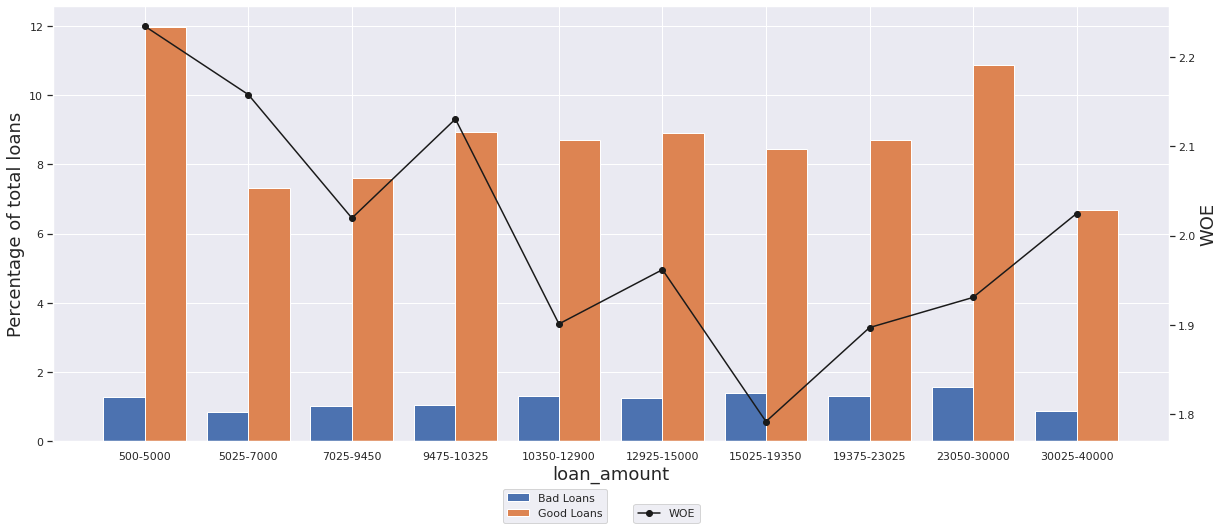

In [ ]:
fig,ax = plt.subplots(figsize = (20,8))
x = list(agg['range'])
Y_1 = list(agg['perc_bads'])
Y_2 = list(agg['perc_goods'])
Y_3 = list(agg['WOE'])
X_axis = np.arange(len(x))
ax.bar(X_axis - 0.2, Y_1, 0.4, label = 'percentage of bad loans')
ax.bar(X_axis + 0.2, Y_2, 0.4, label = 'percentage of good loans')
ax2 = ax.twinx()
ax2.plot(Y_3,marker='o',color = 'k')
ax2.grid(False)
plt.xticks(X_axis, x,rotation = 45)
#ax2.plot(Y_3,marker='o',color = 'r')
ax.set_xlabel('loan_amount',fontsize = 18)
ax.set_ylabel('Percentage of total loans',fontsize = 18)
ax2.set_ylabel('WOE',fontsize = 18)
ax.legend(['Bad Loans','Good Loans'],loc="lower center", bbox_to_anchor=(0.45, -0.2))
ax2.legend(['WOE'],loc="lower center", bbox_to_anchor=(0.55, -0.2))
plt.show()

In [ ]:
agg

min    max        range  ...  perc_bads  perc_goods     index
0    500   4450     500-4450  ...   6.561850    8.503958  0.793219
1   4475   8400    4475-8400  ...  17.297669   19.626246  0.894005
2   8425  12350   8425-12350  ...  21.107440   21.503705  0.983747
3  12375  16300  12375-16300  ...  16.199510   14.905580  1.075698
4  16325  20250  16325-20250  ...  13.714731   12.025864  1.121684
5  20275  24200  20275-24200  ...   7.910974    6.434514  1.196758
6  24225  28150  24225-28150  ...   6.421518    6.118190  1.043430
7  28175  32100  28175-32100  ...   4.567865    4.361304  1.041500
8  32125  36050  32125-36050  ...   5.630383    4.684509  1.173696
9  36075  40000  36075-40000  ...   0.588061    1.836130  0.348502

[10 rows x 10 columns]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

width = .35 # width of a bar

m1_t = pd.DataFrame({
 'abnormal' : [90,40,30,30,30,25,25,20,15,10],
 'fix' : [60,70,65,70,70,60,50,45,45,45],
 'normal' : [140,160,170,180,190,200,210,220,230,240],
 'bad_rate' : [210,100,100,70,70,75,70,60,65,60]})

m1_t[['abnormal','fix','normal']].plot(kind='bar', width = width)
m1_t['bad_rate'].plot(secondary_y=True)

ax = plt.gca()
plt.xlim([-width, len(m1_t['normal'])-width])
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10'))

plt.show()

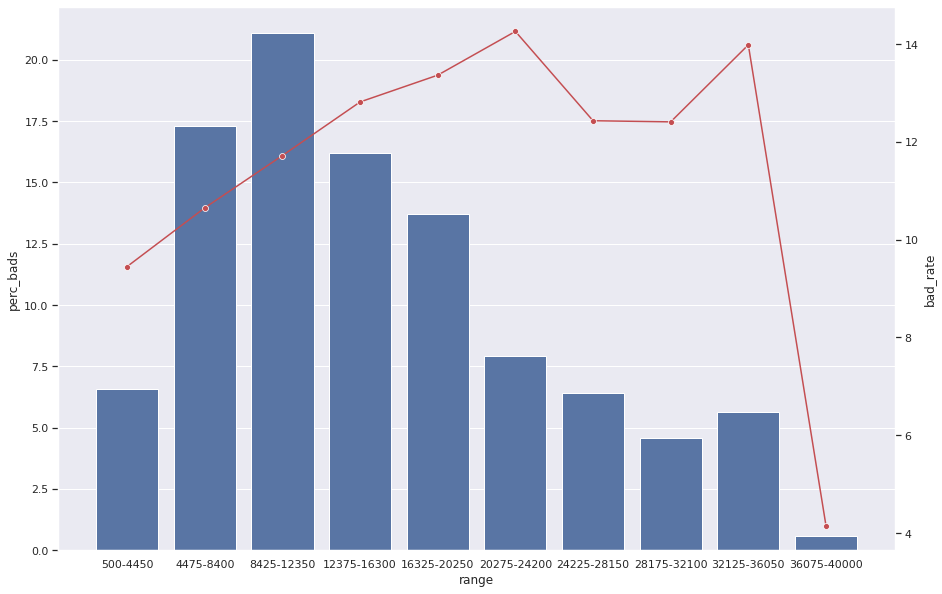

In [ ]:
sns.set(style="darkgrid")
ax,fig = plt.subplots(figsize = (15,10))
ax = sns.barplot(x= 'range',y = 'perc_bads',data = agg,color = 'b') 
ax2 = ax.twinx()
ax2 = sns.lineplot(x = 'range',y='bad_rate',data = agg,marker='o',color = 'r')
#ax3 = ax.twinx()
#ax3 = sns.barplot(x = 'range',y = 'perc_bads',data = agg,color = 'y')
ax2.grid(False)
#ax3.grid(False)
plt.show()

In [ ]:
acc_df.head()

id  member_id  ...    loan_amnt_bucket                   bucket
0  68407277        NaN  ...     (460.5, 4450.0]  (-110000.0, 11000000.0]
1  68355089        NaN  ...  (24200.0, 28150.0]  (-110000.0, 11000000.0]
2  68341763        NaN  ...  (16300.0, 20250.0]  (-110000.0, 11000000.0]
3  66310712        NaN  ...  (32100.0, 36050.0]  (-110000.0, 11000000.0]
4  68476807        NaN  ...   (8400.0, 12350.0]  (-110000.0, 11000000.0]

[5 rows x 156 columns]

In [ ]:
acc_df['loan_amnt'].unique()

array([ 3600., 24700., 20000., ...,   925.,   550.,   850.])

<Figure size 1440x1080 with 0 Axes>

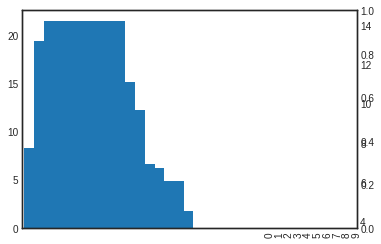

In [ ]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize = (20,15))
fig,ax = plt.subplots()
ax2 = ax.twinx()
ax3 = ax.twinx()

agg.percentage_count.plot(kind = 'bar', ax = ax, width = 8.4, position = 3)
agg.bad_rate.plot(ax = ax2, style = 'y*-', linewidth = 4)

ax3.set_axisoff()
agg.perc_bads.plot(kind = 'bar', ax = ax2, color = 'C1', width = 3.4, position = 1)
ax.set_xticklabels(agg.range, fontsize = 12, rotation = 45)
ax.tick_parans(labelsize = 12)
ax2.tick_params (labelsize = 12)
plt.tight_layout()
plt.title(var, fontsize = 20)


In [ ]:
np.linspace(0,10,10)

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [ ]:
acc_df['loan_amnt_bins'] = pd.cut(acc_df['loan_amnt'], bins=np.linspace(acc_df['loan_amnt'].min(), acc_df['loan_amnt'].max(),11))

In [ ]:
acc_df['loan_amnt_bins'].unique()

[(500.0, 4450.0], (24200.0, 28150.0], (16300.0, 20250.0], (32100.0, 36050.0], (8400.0, 12350.0], ..., (20250.0, 24200.0], (12350.0, 16300.0], (28150.0, 32100.0], NaN, (36050.0, 40000.0]]
Length: 11
Categories (10, interval[float64]): [(500.0, 4450.0] < (4450.0, 8400.0] < (8400.0, 12350.0] <
                                     (12350.0, 16300.0] ... (24200.0, 28150.0] < (28150.0, 32100.0] <
                                     (32100.0, 36050.0] < (36050.0, 40000.0]]

In [ ]:
acc_df['loan_amnt_bins'] = acc_df['loan_amnt_bins'].astype('object')

In [ ]:
acc_df['loan_amnt_bins'] = acc_df['loan_amnt_bins'].astype(str)

In [ ]:
acc_df['loan_amnt_bins']

0             (500.0, 4450.0]
1          (24200.0, 28150.0]
2          (16300.0, 20250.0]
3          (32100.0, 36050.0]
4           (8400.0, 12350.0]
                  ...        
2260696    (36050.0, 40000.0]
2260697    (20250.0, 24200.0]
2260698    (12350.0, 16300.0]
2260699                   nan
2260700                   nan
Name: loan_amnt_bins, Length: 2260701, dtype: object

In [ ]:
acc_df['purpose']

0          debt_consolidation
1              small_business
2            home_improvement
3          debt_consolidation
4              major_purchase
                  ...        
2260696    debt_consolidation
2260697    debt_consolidation
2260698    debt_consolidation
2260699                   NaN
2260700                   NaN
Name: purpose, Length: 2260701, dtype: object

AttributeError: ignored

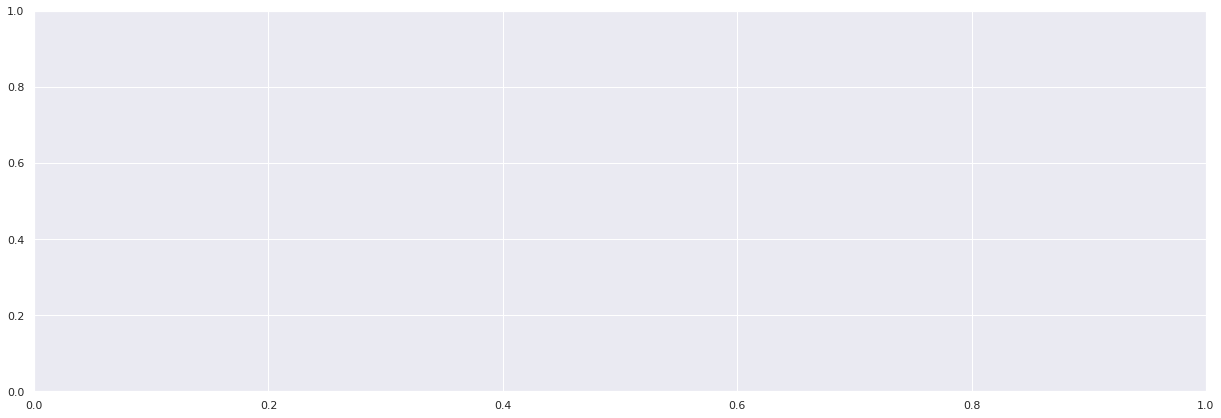

In [ ]:
univariate(df = acc_df,col = 'loan_amnt',vartype = 'continuous',hue = 'loan_status')

In [ ]:
acc_df['annual_inc'].max()

110000000.0

In [ ]:
str(acc_df['loan_amnt'].dtype)

'float64'

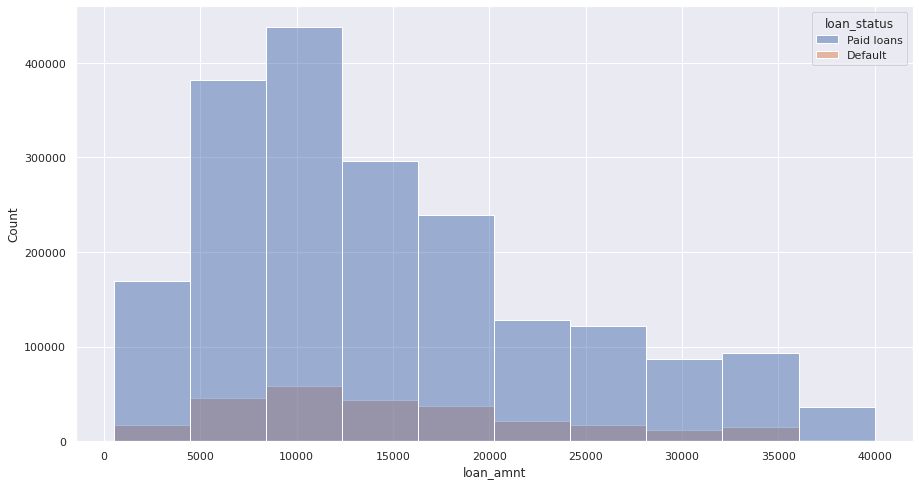

In [ ]:
fig,ax = plt.subplots(figsize = (15,8))
sns.histplot(data = acc_df,x='loan_amnt',hue = 'loan_status',bins = 10,ax = ax)

In [ ]:
categorical = []
numerical = []
for i in acc_df.columns:
  if(str(acc_df[i].dtype) == 'object'):
    categorical.append(i)
  elif(str(acc_df[i].dtype) == 'float64'):
    numerical.append(i)

In [ ]:
temp =acc_df.sample(n= 100000)

In [ ]:
len(numerical)

114

In [ ]:
temp =temp[numerical]
for i in temp.columns:
  temp[i] = temp[i].fillna(temp[i].mean())

In [ ]:
temp.drop(columns = ['member_id'],inplace = True)

In [ ]:
X = temp.drop(columns = ['loan_status'])
Y = temp['loan_status']

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_features = SelectKBest(score_func=f_classif, k=30)
fit = best_features.fit(X,Y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(30,'Score'))  # print 20 best features

               Feature_Name         Score
28     last_fico_range_high  55985.433164
29      last_fico_range_low  44102.640670
25               recoveries  39234.242737
26  collection_recovery_fee  34261.188047
22          total_rec_prncp   5448.419415
18                out_prncp   4585.852447
19            out_prncp_inv   4584.955899
3                  int_rate   4291.633666
27          last_pymnt_amnt   3382.908749
21          total_pymnt_inv   2058.900302
20              total_pymnt   2058.207469
8            fico_range_low   1500.484766
9           fico_range_high   1500.433211
53     acc_open_past_24mths    933.341465
24       total_rec_late_fee    821.058570
10           inq_last_6mths    741.656061
81       num_tl_op_past_12m    693.238068
83         percent_bc_gt_75    644.008582
55           bc_open_to_buy    635.698931
56                  bc_util    604.956275
88           total_bc_limit    513.612764
16               revol_util    476.871192
86          tot_hi_cred_lim    396

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 32 102 104] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
best_features_30 = (feature_scores.nlargest(30,'Score'))['Feature_Name']
best_features_30 = list(best_features_30)


In [ ]:
best_features_30 = best_features_30[0:21]
best_features_30.append('loan_status')

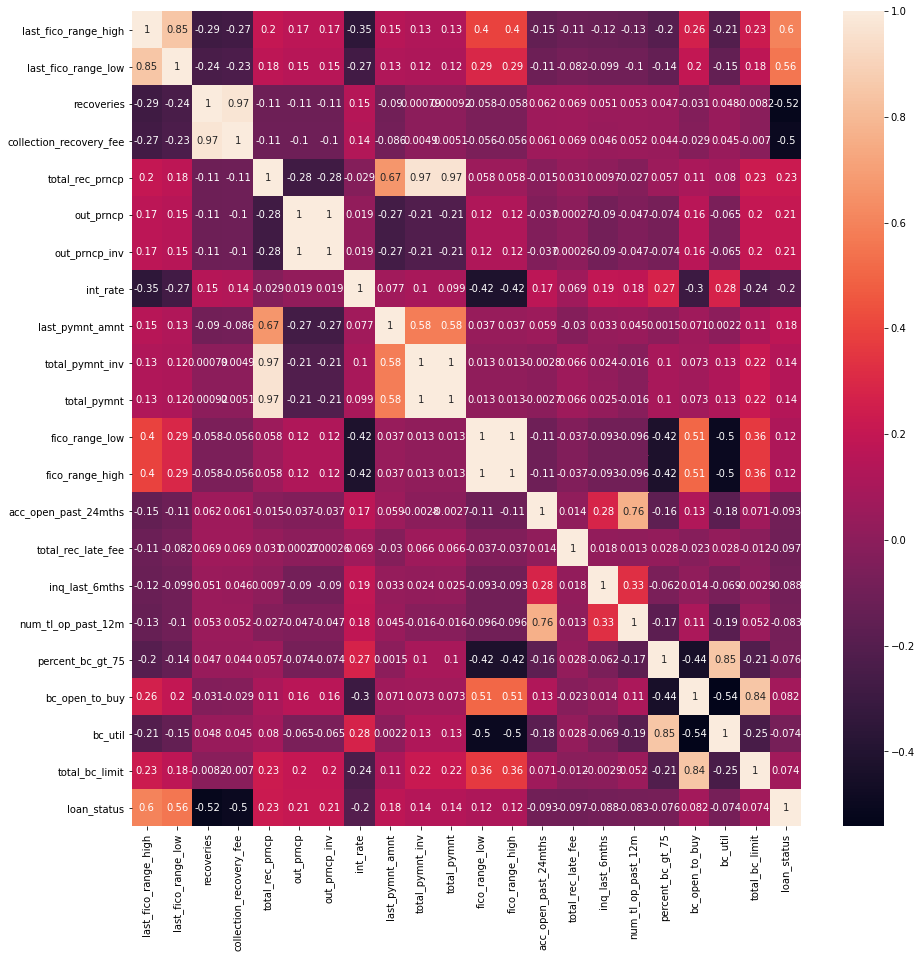

In [ ]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(data = acc_df[best_features_30].corr(),ax= ax,annot=True)

In [ ]:
((temp.corr()['loan_status']).sort_values(ascending = True)).head(30)

recoveries                -0.519147
collection_recovery_fee   -0.490767
int_rate                  -0.198722
total_rec_late_fee        -0.103944
inq_last_6mths            -0.089784
acc_open_past_24mths      -0.086392
num_tl_op_past_12m        -0.076413
percent_bc_gt_75          -0.072493
bc_util                   -0.072452
revol_util                -0.064020
open_rv_24m               -0.051898
inq_last_12m              -0.050522
num_actv_rev_tl           -0.049282
num_rev_tl_bal_gt_0       -0.048812
open_acc_6m               -0.048303
all_util                  -0.044832
open_rv_12m               -0.043658
open_il_24m               -0.043199
open_il_12m               -0.042474
dti                       -0.039815
il_util                   -0.039290
total_rec_int             -0.033687
pub_rec                   -0.033495
inq_fi                    -0.028179
installment               -0.025730
pub_rec_bankruptcies      -0.024214
num_op_rev_tl             -0.023171
num_actv_bc_tl            -0

In [ ]:
default_inc = list((acc_df[acc_df['loan_status'] == "Default"])['annual_inc'])
gini(np.array(default_inc))

0.2972692123618375

In [ ]:
paid_inc = list((acc_df[acc_df['loan_status'] == "Paid loans"])['annual_inc'])
gini(np.array(paid_inc))

nan

In [ ]:
acc_df['loan_status'].unique()

array([nan, 'Default'], dtype=object)

In [ ]:
def crosstab(df,col):
    '''
    df : Dataframe
    col: Column Name
    '''
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Default_rate'] = round((crosstab['Default']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    
    indexes = list(crosstab.index)
    crosstab['index'] = indexes
    crosstab = crosstab.sort_values(by = 'index')
    crosstab['range'] = crosstab['index'].apply(get_range)
    a = list(crosstab['range'])
    b = list(crosstab.iloc[:,3])
    dictionary = {col:a,'Default_rate':b}
    result = pd.DataFrame(data = dictionary,columns = [col,'Default_rate'])
    result[col] = result[col].astype(str)
    return result

In [ ]:
def get_range(x):
  left = x.left
  right = x.right
  return str(left)+"-"+str(right)

In [ ]:
cross = crosstab(acc_df,'loan_amnt_bins')
cross

loan_amnt_bins  Default_rate
0     460.5-4450.0         0.095
1    4450.0-8400.0         0.107
2   8400.0-12350.0         0.117
3  12350.0-16300.0         0.128
4  16300.0-20250.0         0.134
5  20250.0-24200.0         0.143
6  24200.0-28150.0         0.124
7  28150.0-32100.0         0.124
8  32100.0-36050.0         0.140
9  36050.0-40000.0         0.042

In [ ]:
cross = crosstab(acc_df,'loan_amnt_bins')
cross['loan_amnt_bins'] = cross['loan_amnt_bins'].astype(str)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_amnt_bins      10 non-null     object 
 1   Default/Paid_loans  10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 288.0+ bytes


In [ ]:
cross = crosstab(acc_df,'loan_amnt_bins')
ind = list(cross.iloc[:,0].index)
ind.sort()
ind

['(12350.0, 16300.0]',
 '(16300.0, 20250.0]',
 '(20250.0, 24200.0]',
 '(24200.0, 28150.0]',
 '(28150.0, 32100.0]',
 '(32100.0, 36050.0]',
 '(36050.0, 40000.0]',
 '(4450.0, 8400.0]',
 '(500.0, 4450.0]',
 '(8400.0, 12350.0]',
 'nan']

In [ ]:
acc_df['loan_amnt_bins'].

In [ ]:
acc_df['loan_amnt_bins'].unique()

array(['(500.0, 4450.0]', '(24200.0, 28150.0]', '(16300.0, 20250.0]',
       '(32100.0, 36050.0]', '(8400.0, 12350.0]', '(4450.0, 8400.0]',
       '(20250.0, 24200.0]', '(12350.0, 16300.0]', '(28150.0, 32100.0]',
       'nan', '(36050.0, 40000.0]'], dtype=object)

In [ ]:
acc_df.shape

(2260701, 151)

In [ ]:
def univariate(df,col,vartype,hue =None,bins = 10):
    
    '''
    vartype = 'continuous' for continuous variables and 'categorical' for categorical variables
    bins are the number of bins that we want
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 'categorical':
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        cross=  crosstab(df,col)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue)
        ax1 = ax.twinx()
        ax1 = sns.lineplot(x = col,y='Default_rate',data = cross,marker='o',color = 'r')
        ax1.grid(False)
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    
    if vartype == 'continuous':
        df[col+'_bins'] = pd.cut(df[col], bins=bins)
        df[col+'_bins'] = df[col+'_bins'].apply(get_range)
        col = col+'_bins'
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        cross=  crosstab(df,col)
        ax = sns.countplot(data = df, x= col, order=(df[col].unique()).sort_values(),hue = hue)
        ax1 = ax.twinx()
        ax1 = sns.lineplot(x = col,y='Default_rate',data = cross,marker='o',color = 'r')
        ax1.legend()
        ax1.grid(False)
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
  
    else:
        exit
    plt.show()

In [ ]:
acc_df['loan_amnt_bins']

0             (460.5, 4450.0]
1          (24200.0, 28150.0]
2          (16300.0, 20250.0]
3          (32100.0, 36050.0]
4           (8400.0, 12350.0]
                  ...        
2260696    (36050.0, 40000.0]
2260697    (20250.0, 24200.0]
2260698    (12350.0, 16300.0]
2260699                   NaN
2260700                   NaN
Name: loan_amnt_bins, Length: 2260701, dtype: category
Categories (10, interval[float64]): [(460.5, 4450.0] < (4450.0, 8400.0] < (8400.0, 12350.0] <
                                     (12350.0, 16300.0] ... (24200.0, 28150.0] < (28150.0, 32100.0] <
                                     (32100.0, 36050.0] < (36050.0, 40000.0]]

In [ ]:
m = acc_df['loan_amnt_bins'].unique()
m = m.sort_values()
m

[(500.0, 4450.0], (4450.0, 8400.0], (8400.0, 12350.0], (12350.0, 16300.0], (16300.0, 20250.0], ..., (24200.0, 28150.0], (28150.0, 32100.0], (32100.0, 36050.0], (36050.0, 40000.0], NaN]
Length: 11
Categories (10, interval[float64]): [(500.0, 4450.0] < (4450.0, 8400.0] < (8400.0, 12350.0] <
                                     (12350.0, 16300.0] ... (24200.0, 28150.0] < (28150.0, 32100.0] <
                                     (32100.0, 36050.0] < (36050.0, 40000.0]]

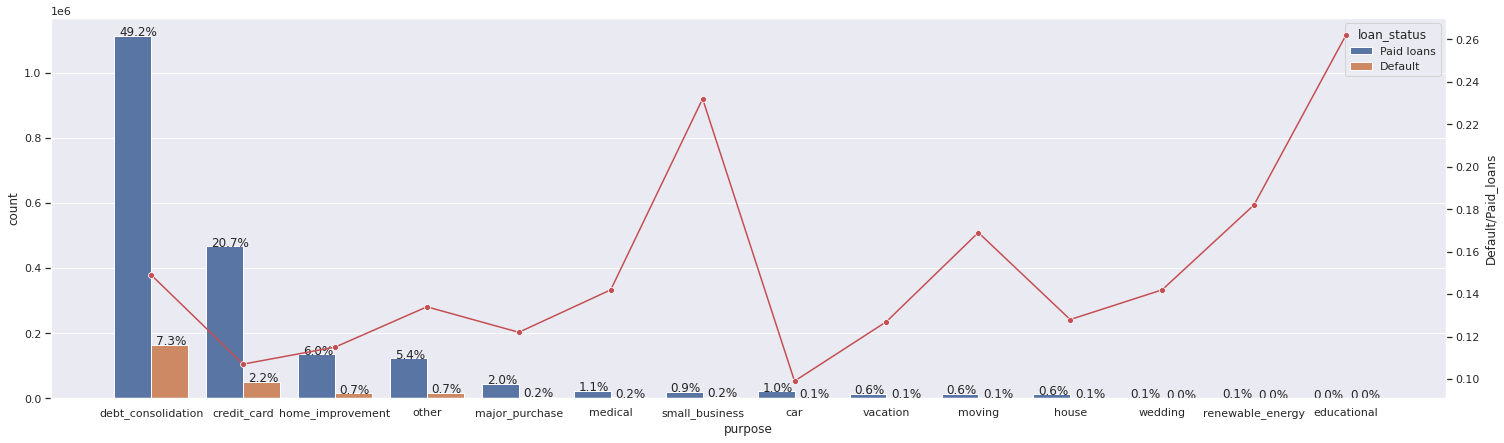

In [ ]:
univariate(df = acc_df,col = 'purpose',vartype = 1,hue = 'loan_status')

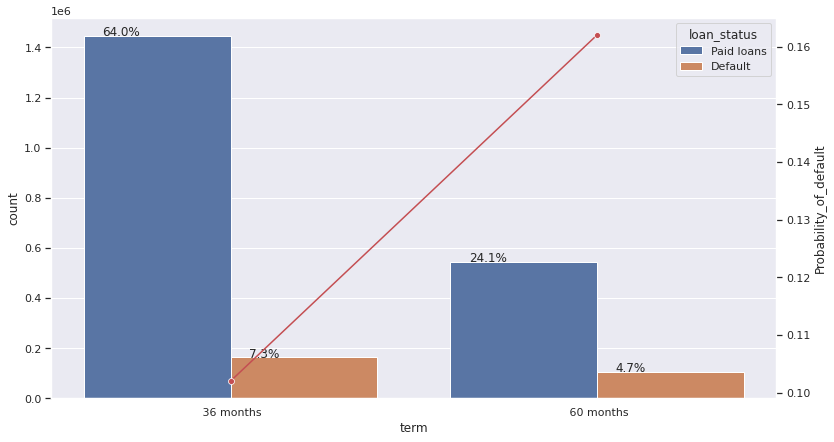

In [ ]:
univariate(df = acc_df,col = 'term',vartype = 1,hue = 'loan_status')

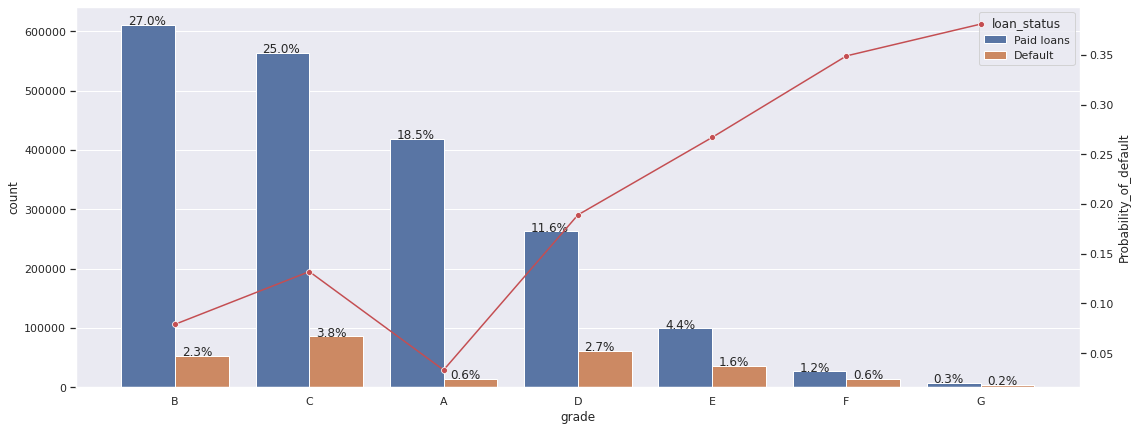

In [ ]:
univariate(df = acc_df,col = 'grade',vartype = 1,hue = 'loan_status')

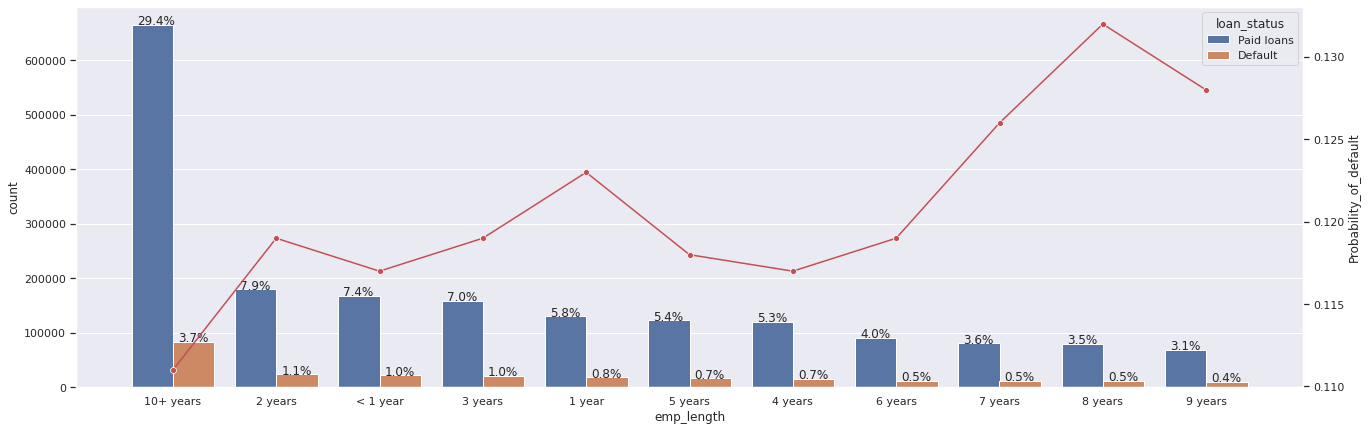

In [ ]:
univariate(df = acc_df,col = 'emp_length',vartype = 1,hue = 'loan_status')

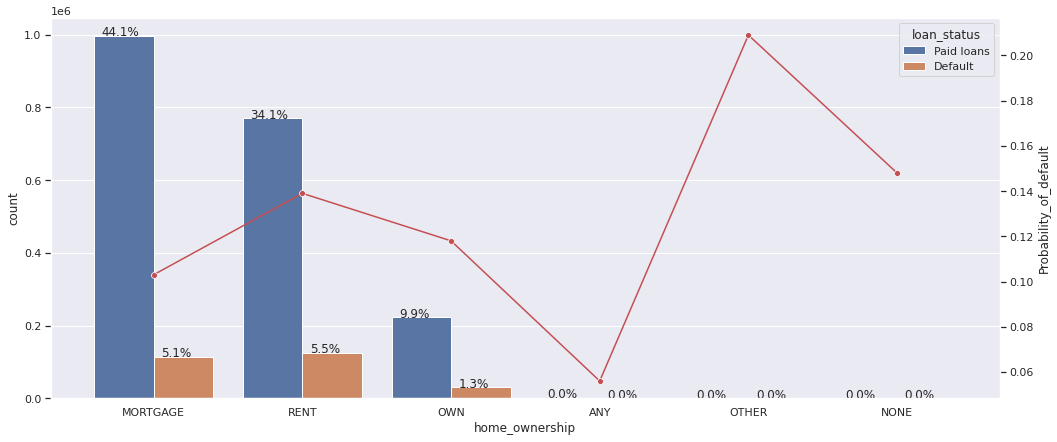

In [ ]:
univariate(df = acc_df,col = 'home_ownership',vartype = 1,hue = 'loan_status')

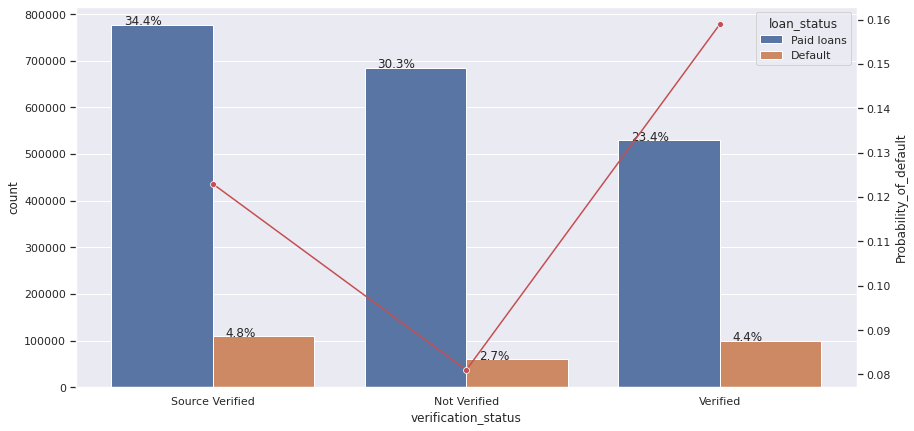

In [ ]:
univariate(df = acc_df,col = 'verification_status',vartype = 1,hue = 'loan_status')


In [ ]:
acc_df['issue_d'].unique()

array(['Dec-2015', 'Nov-2015', 'Oct-2015', 'Sep-2015', 'Aug-2015',
       'Jul-2015', 'Jun-2015', 'May-2015', 'Apr-2015', 'Mar-2015',
       'Feb-2015', 'Jan-2015', nan, 'Mar-2018', 'Feb-2018', 'Jan-2018',
       'Sep-2017', 'Aug-2017', 'Jul-2017', 'Jun-2016', 'May-2016',
       'Apr-2016', 'Sep-2018', 'Aug-2018', 'Jul-2018', 'Jun-2017',
       'May-2017', 'Apr-2017', 'Mar-2016', 'Feb-2016', 'Jan-2016',
       'Dec-2014', 'Nov-2014', 'Oct-2014', 'Sep-2014', 'Aug-2014',
       'Jul-2014', 'Jun-2014', 'May-2014', 'Apr-2014', 'Mar-2014',
       'Feb-2014', 'Jan-2014', 'Dec-2018', 'Nov-2018', 'Oct-2018',
       'Jun-2018', 'May-2018', 'Apr-2018', 'Dec-2011', 'Nov-2011',
       'Oct-2011', 'Sep-2011', 'Aug-2011', 'Jul-2011', 'Jun-2011',
       'May-2011', 'Apr-2011', 'Mar-2011', 'Feb-2011', 'Jan-2011',
       'Dec-2010', 'Nov-2010', 'Oct-2010', 'Sep-2010', 'Aug-2010',
       'Jul-2010', 'Jun-2010', 'May-2010', 'Apr-2010', 'Mar-2010',
       'Feb-2010', 'Jan-2010', 'Dec-2009', 'Nov-2009', 'O

In [ ]:
acc_df['issue_month'],acc_df['issue_year'] = acc_df['issue_d'].str.split('-', 1).str

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


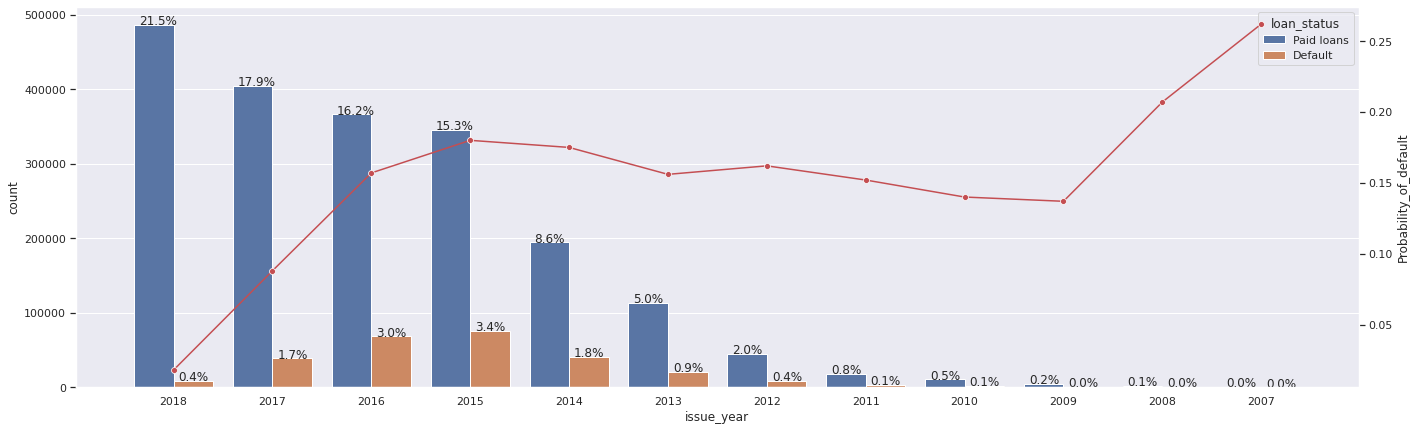

In [ ]:
univariate(df = acc_df,col = 'issue_year',vartype = 1,hue = 'loan_status')

In [ ]:
acc_df['loan_status'].unique()

array(['Paid loans', 'Default', nan], dtype=object)

In [ ]:
removed = ['id','url','zip_code']
acc_df.drop(columns = removed,inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


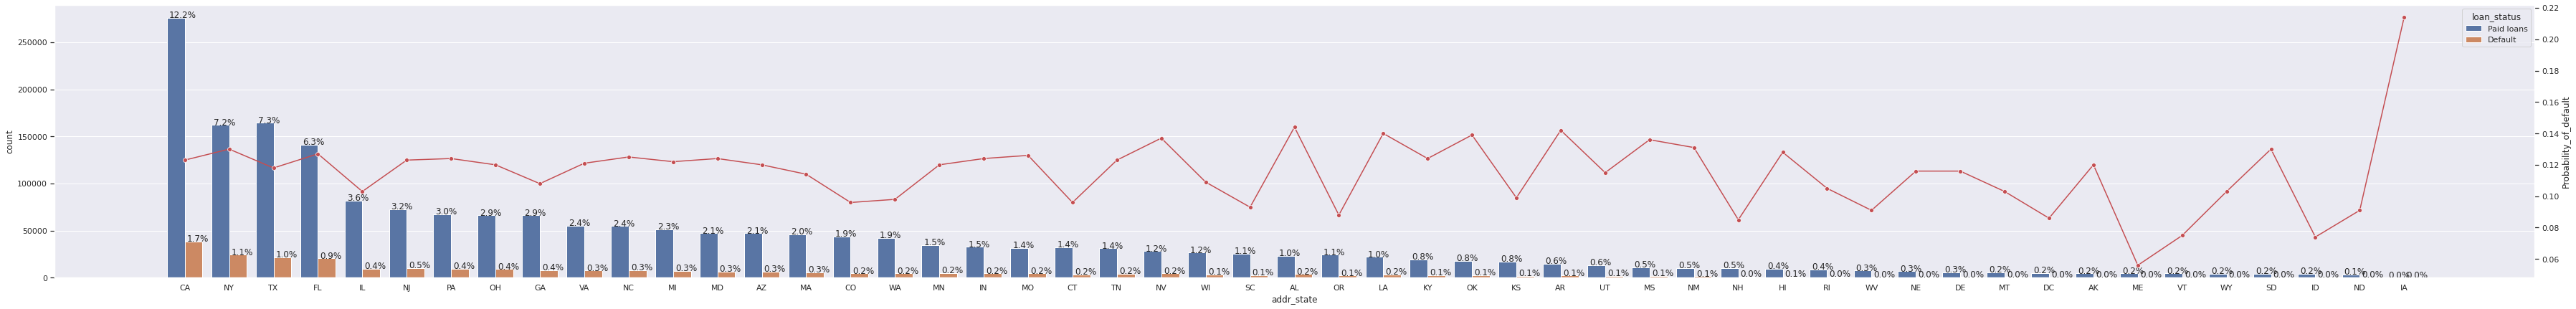

In [ ]:
univariate(df = acc_df,col = 'addr_state',vartype = 1,hue = 'loan_status')

In [ ]:
acc_df['earliest_cr_line'].value_counts()

Sep-2004    15400
Sep-2003    15215
Sep-2005    14780
Aug-2003    14669
Aug-2004    14413
            ...  
Nov-1955        1
Apr-1957        1
Sep-1951        1
May-1950        1
Jun-1955        1
Name: earliest_cr_line, Length: 754, dtype: int64

In [ ]:
acc_df['initial_list_status'].value_counts()

w    1535467
f     725201
Name: initial_list_status, dtype: int64

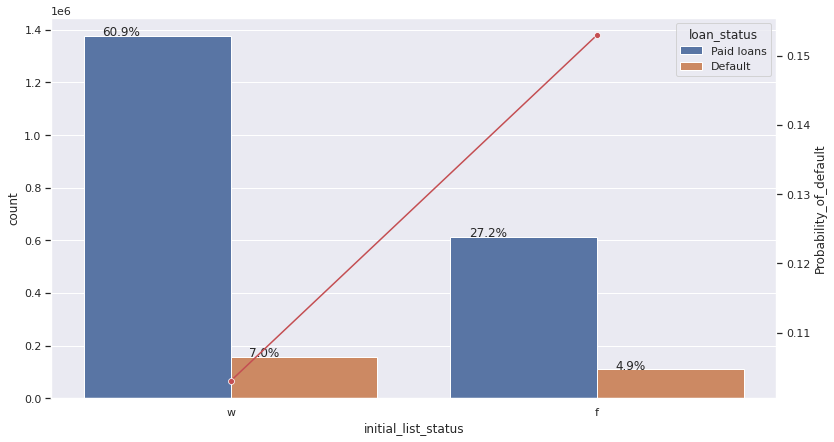

In [ ]:
univariate(df = acc_df,col = 'initial_list_status',vartype = 1,hue = 'loan_status')

In [ ]:
acc_df['last_pymnt_d'].value_counts()

Mar-2019    853003
Feb-2019     97074
Aug-2018     39615
Jan-2019     38483
Mar-2018     38269
             ...  
Jun-2008        20
Mar-2008        18
Jan-2008        11
Feb-2008         8
Dec-2007         2
Name: last_pymnt_d, Length: 136, dtype: int64

In [ ]:
acc_df['last_pymnt_month'],acc_df['last_pymnt_year'] = acc_df['last_pymnt_d'].str.split('-', 1).str

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


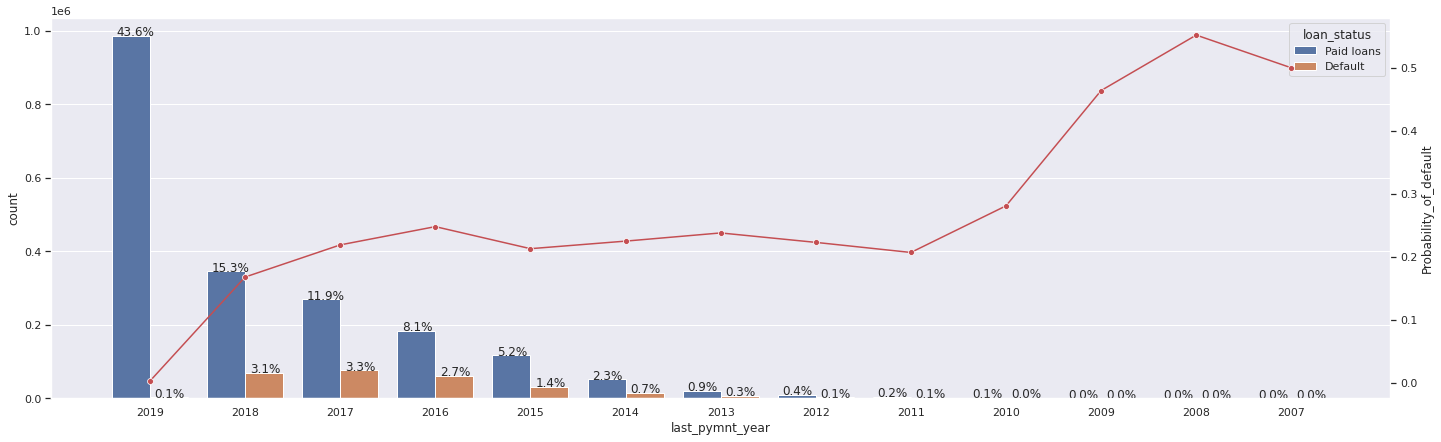

In [ ]:
univariate(df = acc_df,col = 'last_pymnt_year',vartype = 1,hue = 'loan_status')

In [ ]:
acc_df['application_type'].value_counts()

Individual    2139958
Joint App      120710
Name: application_type, dtype: int64

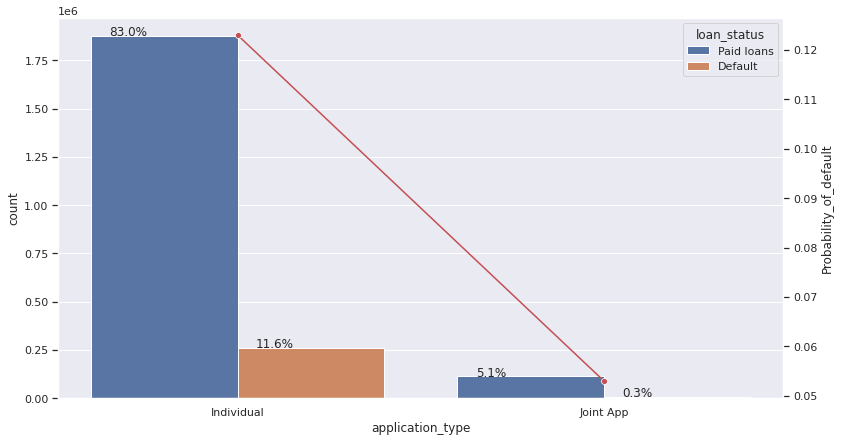

In [ ]:
univariate(df = acc_df,col = 'application_type',vartype = 1,hue = 'loan_status')

In [ ]:
acc_df['settlement_status'].value_counts()

ACTIVE      14704
COMPLETE    14505
BROKEN       5037
Name: settlement_status, dtype: int64

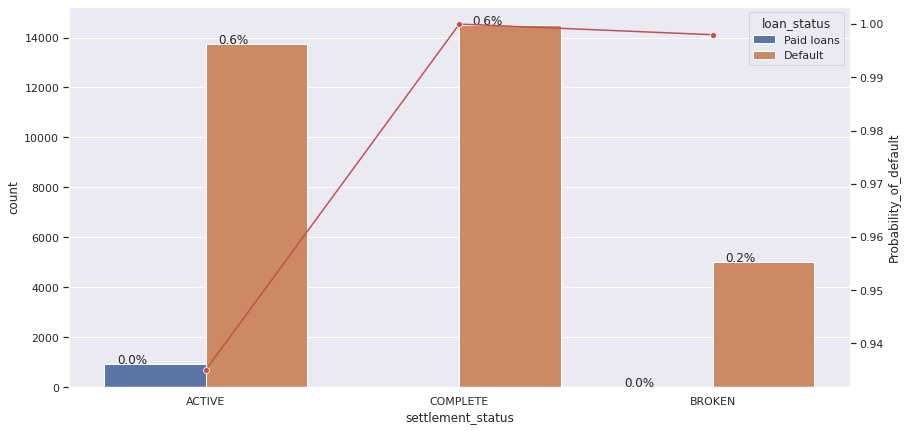

In [ ]:
univariate(df = acc_df,col = 'settlement_status',vartype = 1,hue = 'loan_status')

In [ ]:
acc_df['settlement_date'].value_counts()

Jan-2019    1710
Oct-2018    1526
Feb-2019    1424
Mar-2018    1406
Sep-2018    1404
            ... 
Feb-2010       1
Mar-2009       1
Jan-2012       1
Dec-2012       1
Feb-2011       1
Name: settlement_date, Length: 90, dtype: int64

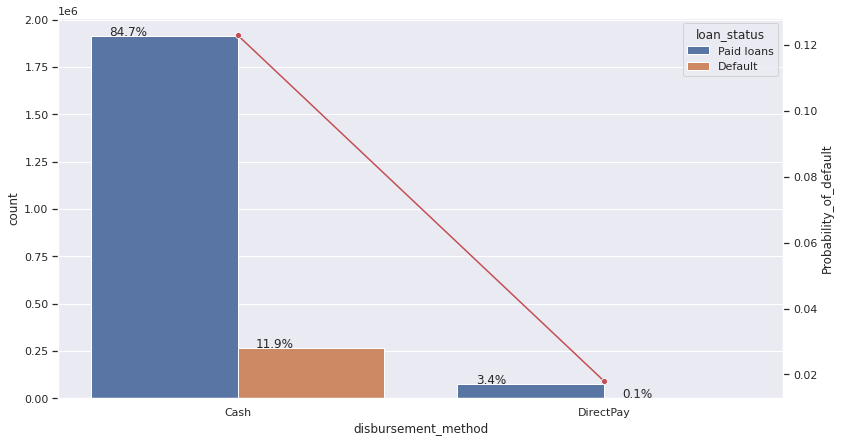

In [ ]:
univariate(df = acc_df,col = 'disbursement_method',vartype = 1,hue = 'loan_status')

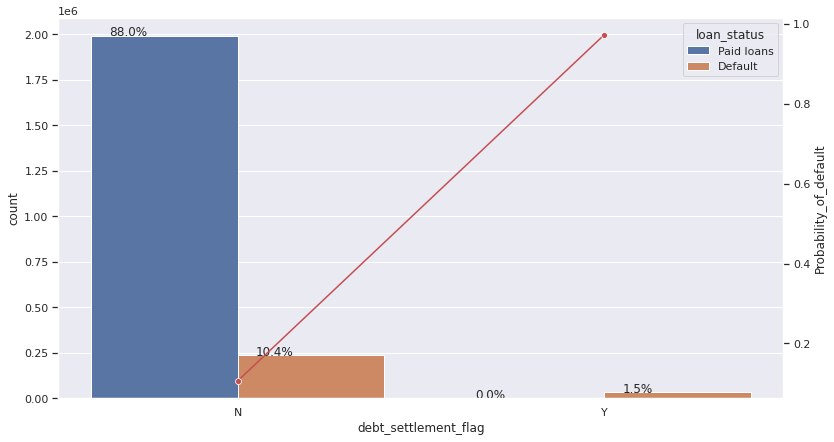

In [ ]:
univariate(df = acc_df,col = 'debt_settlement_flag',vartype = 1,hue = 'loan_status')

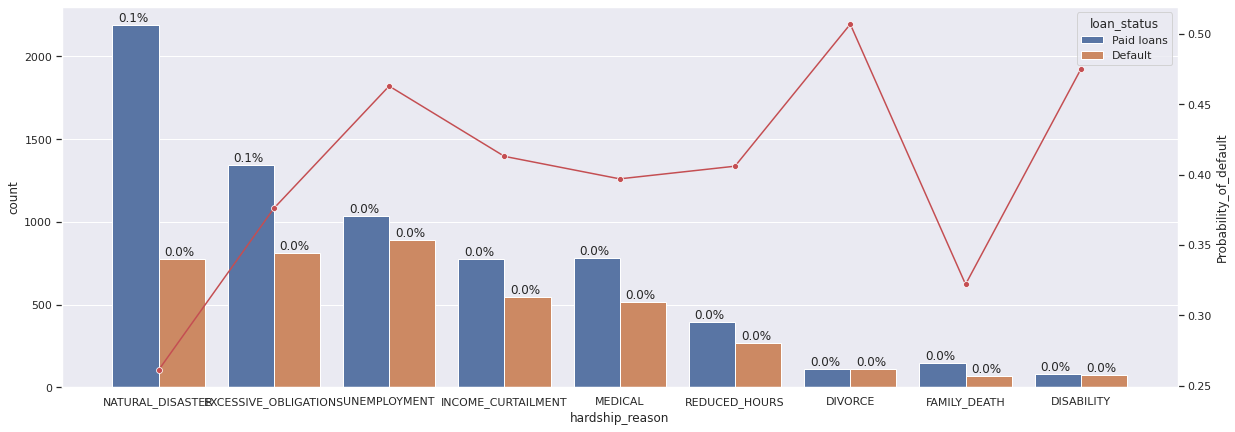

In [ ]:
univariate(df = acc_df,col = 'hardship_reason',vartype = 1,hue = 'loan_status')

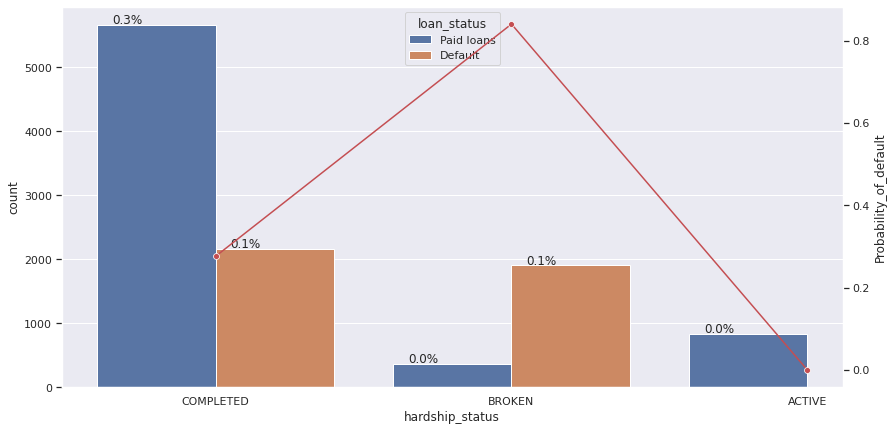

In [ ]:
univariate(df = acc_df,col = 'hardship_status',vartype = 1,hue = 'loan_status')

In [ ]:
cross=  crosstab(acc_df,'emp_length')
cross
##fig,ax =plt.subplots(figsize = (28,8))
##sns.lineplot(x = 'purpose',y='Probability_of_default',data = cross,ax = ax,marker='o',color = 'r')

loan_status  Default  Paid loans     All  Probability_Charged Off
emp_length                                                       
1 year         18290      130113  148403                    0.123
10+ years      83223      664782  748005                    0.111
2 years        24205      179472  203677                    0.119
3 years        21563      159190  180753                    0.119
4 years        15958      120647  136605                    0.117
5 years        16545      123153  139698                    0.118
6 years        12185       90443  102628                    0.119
7 years        11652       81043   92695                    0.126
8 years        12135       79779   91914                    0.132
9 years        10158       69237   79395                    0.128
< 1 year       22296      167692  189988                    0.117

In [ ]:
acc_df.shape

(2260701, 150)

In [ ]:
a = list(cross.iloc[:,0].index)
b = list(cross.iloc[:,3])
dictionary = {'attribute':a,'Probability_of_default':b}
return pd.DataFrame(data = dictionary,columns = ['attribute','Probability_of_default'])

{'attribute': ['car', 'credit_card', 'debt_consolidation', 'educational', 'home_improvement', 'house', 'major_purchase', 'medical', 'moving', 'other', 'renewable_energy', 'small_business', 'vacation', 'wedding'], 'Probability_of_default': [0.09, 0.097, 0.129, 0.208, 0.104, 0.113, 0.109, 0.124, 0.145, 0.118, 0.154, 0.188, 0.112, 0.124]}


attribute  Probability_of_default
0                  car                   0.090
1          credit_card                   0.097
2   debt_consolidation                   0.129
3          educational                   0.208
4     home_improvement                   0.104
5                house                   0.113
6       major_purchase                   0.109
7              medical                   0.124
8               moving                   0.145
9                other                   0.118
10    renewable_energy                   0.154
11      small_business                   0.188
12            vacation                   0.112
13             wedding                   0.124

In [ ]:
def bivariate_prob(df,col,stacked= True):
    '''
    df      : Dataframe
    col     : Column Name
    stacked : True(default) for Stacked Bar
    '''
    # get dataframe from crosstab function
    plotCrosstab,maxx = crosstab(df,col)
    
    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'r')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    #ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

In [ ]:
purpose,maxx = crosstab(acc_df,'purpose')
display(purpose)

print("maximum")
display(maxx)


loan_status         Default  Paid loans      All  Probability_Charged Off
purpose                                                                  
car                    2157       21856    24013                    0.090
credit_card           50057      466914   516971                    0.097
debt_consolidation   165327     1112550  1277877                    0.129
educational              88         336      424                    0.208
home_improvement      15576      134881   150457                    0.104
house                  1599       12537    14136                    0.113
major_purchase         5498       44947    50445                    0.109
medical                3411       24077    27488                    0.124
moving                 2229       13174    15403                    0.145
other                 16508      122932   139440                    0.118
renewable_energy        222        1223     1445                    0.154
small_business         4652       20037    24689                    0.188
vacation               1744       13781    15525                    0.112
wedding                 292        2063     2355                    0.124

maximum


loan_status  Default  Paid loans  All  Probability_Charged Off
purpose                                                       
educational       88         336  424                    0.208

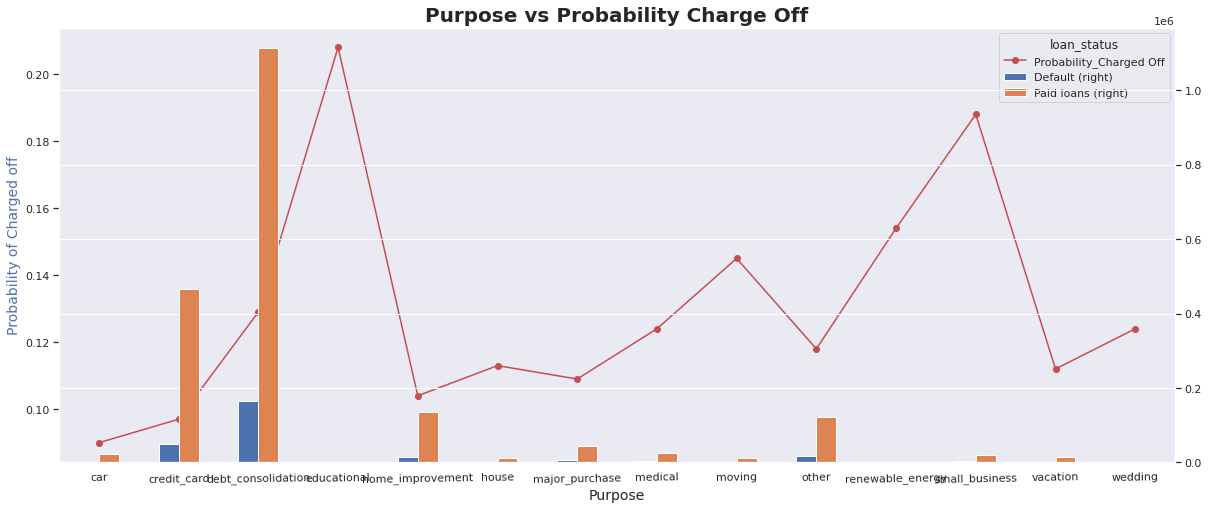

In [ ]:
bivariate_prob(df=acc_df,col='purpose',stacked=False)

In [ ]:
acc_df['addr_state'].value_counts()

CA    314533
NY    186389
TX    186335
FL    161991
IL     91173
NJ     83132
PA     76939
OH     75132
GA     74196
VA     62954
NC     62730
MI     58770
MD     54008
AZ     53777
MA     51784
CO     48183
WA     47060
MN     39517
IN     37515
MO     36084
CT     35785
TN     35483
NV     32657
WI     29877
SC     28003
AL     27284
OR     26789
LA     25759
KY     21887
OK     20691
KS     19109
AR     17074
UT     14993
MS     12639
NM     11986
NH     11142
HI     10668
RI     10005
WV      8351
NE      7819
DE      6458
MT      6299
DC      5356
AK      5231
ME      4974
VT      4937
WY      4748
SD      4549
ID      4308
ND      3591
IA        14
Name: addr_state, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


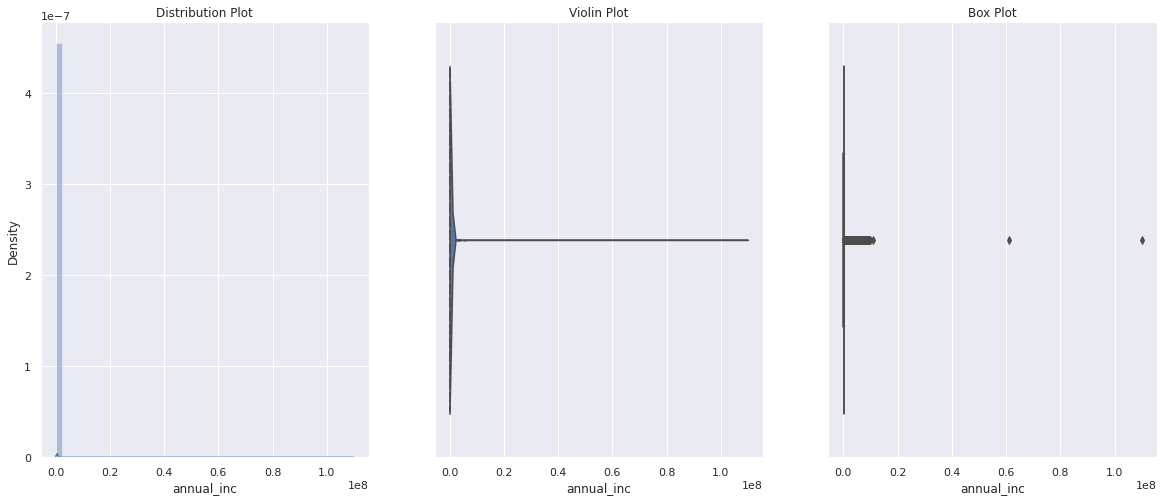

In [ ]:
univariate(acc_df,'annual_inc',vartype=0,hue =None)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


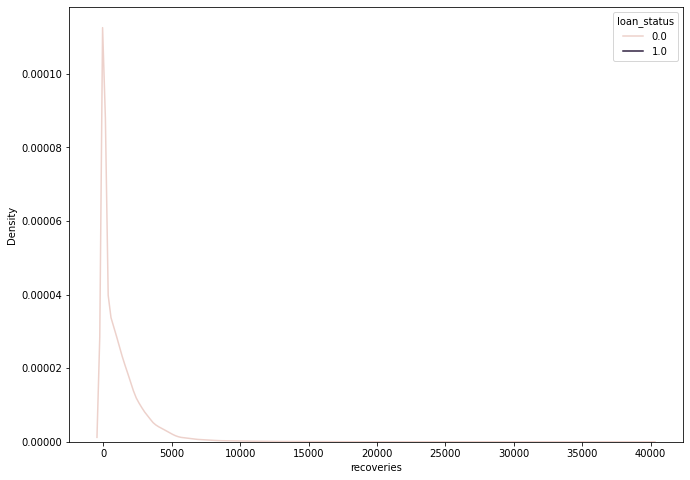

In [ ]:
fig, ax = plt.subplots(figsize= (11,8))

sns.kdeplot(data = acc_df,x = 'recoveries',hue = 'loan_status',ax=ax)